**IMPORTS**

In [1]:
!pip install kaggle

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
from google.colab import files
files.upload()

credit_card_default_train.csv was uploaded

**DATA-PREPARATION**

In [5]:
import pandas as pd

cc_train = pd.read_csv('credit_card_default_train.csv')
cc_train.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [6]:
for col in cc_train.columns: 
    print(col)

Client_ID
Balance_Limit_V1
Gender
EDUCATION_STATUS
MARITAL_STATUS
AGE
PAY_JULY
PAY_AUG
PAY_SEP
PAY_OCT
PAY_NOV
PAY_DEC
DUE_AMT_JULY
DUE_AMT_AUG
DUE_AMT_SEP
DUE_AMT_OCT
DUE_AMT_NOV
DUE_AMT_DEC
PAID_AMT_JULY
PAID_AMT_AUG
PAID_AMT_SEP
PAID_AMT_OCT
PAID_AMT_NOV
PAID_AMT_DEC
NEXT_MONTH_DEFAULT


In [7]:
cc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
Client_ID             24000 non-null object
Balance_Limit_V1      24000 non-null object
Gender                24000 non-null object
EDUCATION_STATUS      24000 non-null object
MARITAL_STATUS        24000 non-null object
AGE                   24000 non-null object
PAY_JULY              24000 non-null int64
PAY_AUG               24000 non-null int64
PAY_SEP               24000 non-null int64
PAY_OCT               24000 non-null int64
PAY_NOV               24000 non-null int64
PAY_DEC               24000 non-null int64
DUE_AMT_JULY          24000 non-null int64
DUE_AMT_AUG           24000 non-null int64
DUE_AMT_SEP           24000 non-null int64
DUE_AMT_OCT           24000 non-null int64
DUE_AMT_NOV           24000 non-null int64
DUE_AMT_DEC           24000 non-null int64
PAID_AMT_JULY         24000 non-null int64
PAID_AMT_AUG          24000 non-null int64
PAID_AMT_SEP          240

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cc_train, test_size=0.2, random_state=96)

Saving figure attribute_histogram_plots


FileNotFoundError: ignored

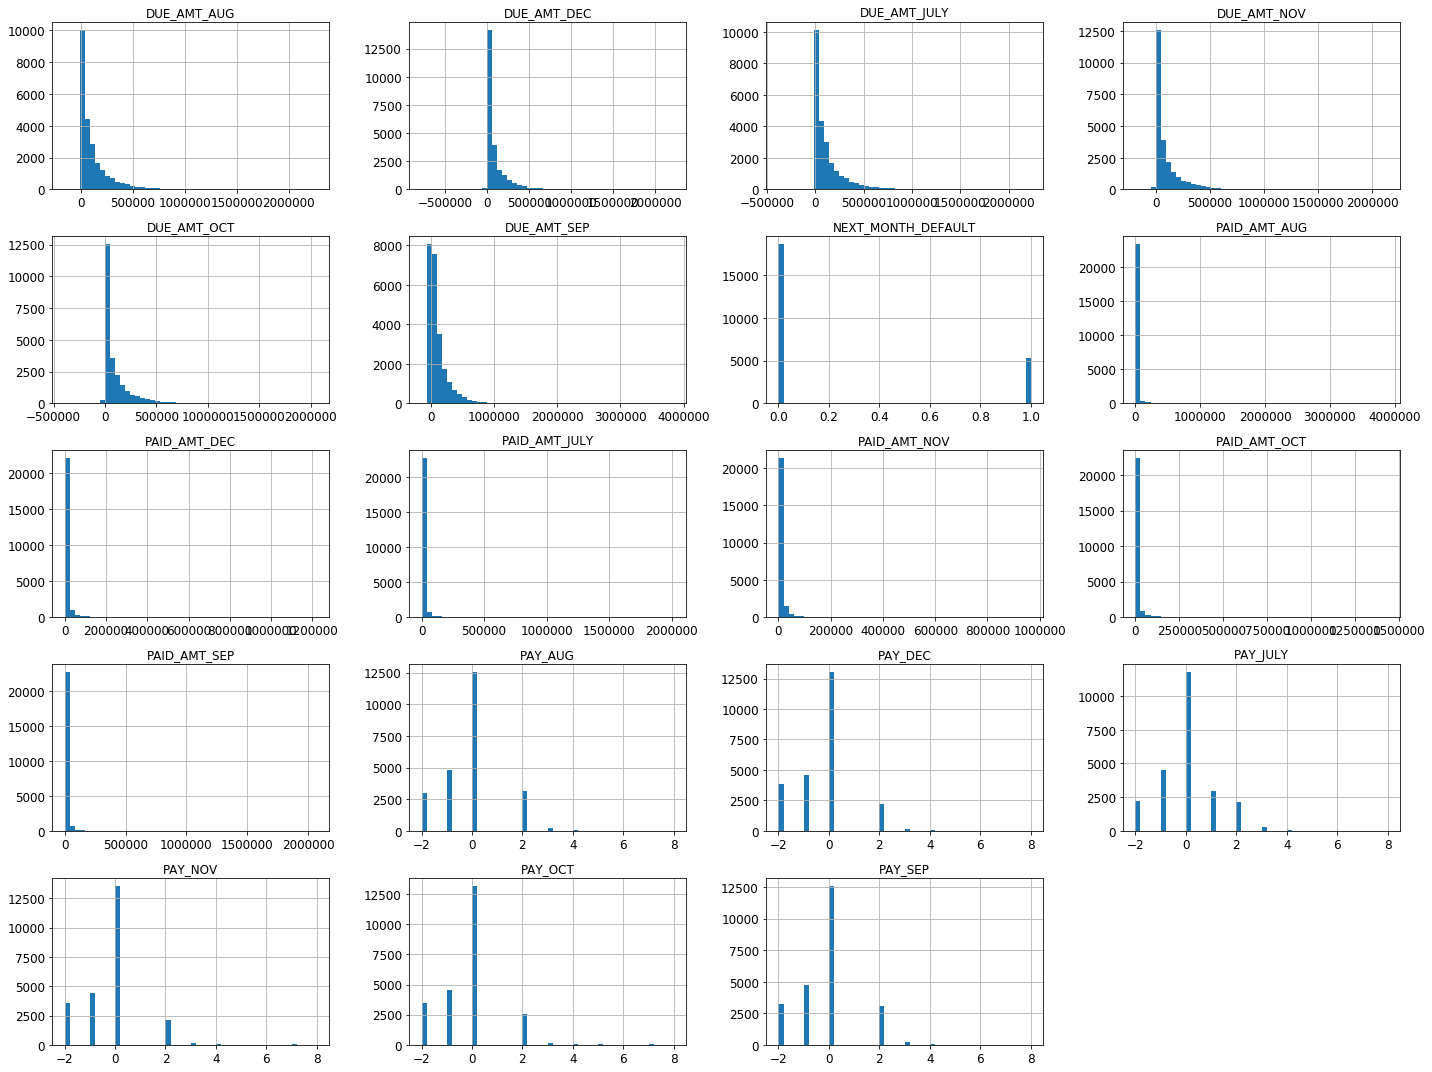

In [9]:
import matplotlib.pyplot as plt
cc_train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:
cc_train1=cc_train.copy()

In [11]:
corr_matrix = cc_train1.corr()
corr_matrix["NEXT_MONTH_DEFAULT"].sort_values(ascending=False)

NEXT_MONTH_DEFAULT    1.000000
PAY_JULY              0.324362
PAY_AUG               0.260531
PAY_SEP               0.229338
PAY_OCT               0.212407
PAY_NOV               0.201231
PAY_DEC               0.187095
DUE_AMT_DEC          -0.006521
DUE_AMT_NOV          -0.007614
DUE_AMT_OCT          -0.009755
DUE_AMT_SEP          -0.014722
DUE_AMT_AUG          -0.015180
DUE_AMT_JULY         -0.020010
PAID_AMT_DEC         -0.052466
PAID_AMT_NOV         -0.053849
PAID_AMT_OCT         -0.056143
PAID_AMT_SEP         -0.057808
PAID_AMT_AUG         -0.059039
PAID_AMT_JULY        -0.072891
Name: NEXT_MONTH_DEFAULT, dtype: float64

In [0]:
cc_attr=train_set.drop(["NEXT_MONTH_DEFAULT","Client_ID"],axis=1)

In [13]:
cc_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 3130 to 14420
Data columns (total 23 columns):
Balance_Limit_V1    19200 non-null object
Gender              19200 non-null object
EDUCATION_STATUS    19200 non-null object
MARITAL_STATUS      19200 non-null object
AGE                 19200 non-null object
PAY_JULY            19200 non-null int64
PAY_AUG             19200 non-null int64
PAY_SEP             19200 non-null int64
PAY_OCT             19200 non-null int64
PAY_NOV             19200 non-null int64
PAY_DEC             19200 non-null int64
DUE_AMT_JULY        19200 non-null int64
DUE_AMT_AUG         19200 non-null int64
DUE_AMT_SEP         19200 non-null int64
DUE_AMT_OCT         19200 non-null int64
DUE_AMT_NOV         19200 non-null int64
DUE_AMT_DEC         19200 non-null int64
PAID_AMT_JULY       19200 non-null int64
PAID_AMT_AUG        19200 non-null int64
PAID_AMT_SEP        19200 non-null int64
PAID_AMT_OCT        19200 non-null int64
PAID_AMT_NOV        19

In [0]:
cc_labels = train_set["NEXT_MONTH_DEFAULT"].copy()

In [0]:
cc_data=cc_attr.copy()

In [16]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19200 entries, 3130 to 14420
Data columns (total 23 columns):
Balance_Limit_V1    19200 non-null object
Gender              19200 non-null object
EDUCATION_STATUS    19200 non-null object
MARITAL_STATUS      19200 non-null object
AGE                 19200 non-null object
PAY_JULY            19200 non-null int64
PAY_AUG             19200 non-null int64
PAY_SEP             19200 non-null int64
PAY_OCT             19200 non-null int64
PAY_NOV             19200 non-null int64
PAY_DEC             19200 non-null int64
DUE_AMT_JULY        19200 non-null int64
DUE_AMT_AUG         19200 non-null int64
DUE_AMT_SEP         19200 non-null int64
DUE_AMT_OCT         19200 non-null int64
DUE_AMT_NOV         19200 non-null int64
DUE_AMT_DEC         19200 non-null int64
PAID_AMT_JULY       19200 non-null int64
PAID_AMT_AUG        19200 non-null int64
PAID_AMT_SEP        19200 non-null int64
PAID_AMT_OCT        19200 non-null int64
PAID_AMT_NOV        19

In [17]:
cc_labels.describe

<bound method NDFrame.describe of 3130     0
23977    1
21794    0
16092    0
18190    0
        ..
8801     0
22132    0
2412     0
9638     0
14420    0
Name: NEXT_MONTH_DEFAULT, Length: 19200, dtype: int64>

In [0]:
cc_num = cc_data.drop(["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]  ,axis=1)

In [0]:
cc_cat = cc_data[["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]].copy()

In [0]:
cc_data1=cc_data.copy()

**TRANSFORMATION-PIPELINE**

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(cc_num)
cat_attribs = list(cc_cat)

full_pipeline = ColumnTransformer([
        ('imputer' , SimpleImputer(strategy="median"),num_attribs),
        ('std_scaler' , StandardScaler(),num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

cc_prepared = full_pipeline.fit_transform(cc_data1)

In [0]:
cc_attr_test=test_set.drop(["NEXT_MONTH_DEFAULT","Client_ID"], axis=1)

In [0]:
cc_labels_test = test_set["NEXT_MONTH_DEFAULT"].copy()

In [0]:
cc_data_test=cc_attr_test.copy()

In [0]:
cc_num_test = cc_data_test.drop(["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]  ,axis=1)

In [0]:
cc_cat_test = cc_data_test[["Balance_Limit_V1","Gender","EDUCATION_STATUS","MARITAL_STATUS","AGE"]]

In [0]:
cc_date1_test=cc_data_test.copy()

In [0]:
cc_prepared_test = full_pipeline.fit_transform(cc_date1_test)

In [29]:
cc_prepared_test.shape

(4800, 55)

**DUE TO THE IMBALANCE NATURE OF THE DATA WE UPSAMPLED THE DATA**

In [30]:
!pip install imblearn

In [31]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(cc_prepared, cc_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
smt = SMOTE()
X_train_test, y_train_test = smt.fit_sample(cc_prepared_test, cc_labels_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**MODEL TRAINING AND CROSS VALIDATION**

In [0]:
import xgboost
xgb_reg = xgboost.XGBClassifier()
xgb_reg.fit(X_train, y_train)
y_pred_boost = xgb_reg.predict(X_train_test)

In [36]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score


print(accuracy_score(y_train_test, y_pred_boost))

0.8773992971073263
